In [ ]:
# Importing the appropriate packages to use during this notebook, although some
# may be installed later where they were used appropriately.

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Notebooks/Expression AI/

/content/drive/My Drive/Notebooks/Expression AI


In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
import keras.backend as K
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
# Creation of the Data frames where we're drawing the bulk of our data from.

rawdata = '/content/drive/My Drive/Notebooks/Expression AI/data.csv'
face_df = pd.read_csv(rawdata)

In [ ]:
# As you could see below, this dataframe holds 31 columns and 2140 rows of data, where each row is represents the data for each individual 
# picture along with it's keypoints, which is what we will be using to train our model.

face_df

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [ ]:
face_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
face_df['Image'][0].shape

AttributeError: ignored

In [ ]:
# The data within the column 'Image' represents the value of a pixel ranging from 0 to 255, where 0 represents black and 255 represents white.
# Each image we're training is a 96 pixels by 96 pixels, so if we convert the 1-D space-seperated values in that column into a 2-D array of
# 96 rows vs 96 columns, we'll be able to convert those values into actual images.

face_df['Image'] = face_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96,96))

In [ ]:
face_df['Image'][0].shape

(96, 96)

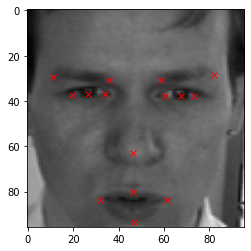

In [ ]:
# Let's draw a random image within the dataset, but also plot the points we are using to train the neural network
# There's a total of 31 columns, the last one being the image, where the first 30 represent an x or y component for a single coordinate point.
# The columns start with an x-component followed by the coordinate point's respective y-component.
n = np.random.randint(1,len(face_df))
plt.imshow(face_df['Image'][n], cmap = 'gray')
for m in range(1,31,2):                                       # Using m as an index will sort through the 30 values while n selects the image
    plt.plot(face_df.loc[n][m-1], face_df.loc[n][m], 'rx')    # with the respective points.


In [ ]:
# Let's now add more rows to the data by augmenting the existing rows, like adding a horizontally flipped set and scaled up brightness set. 
import copy
import random

face_df_copy = copy.copy(face_df)
copy_df_col = face_df_copy.columns[:-1]

# This is for the horizontal flip set :
face_df_copy['Image'] = face_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))
for i in range(len(copy_df_col)):
  if i%2 == 0:
    face_df_copy[copy_df_col[i]] = face_df_copy[copy_df_col[i]].apply(lambda x: 96. - float(x) )

extended_df = np.concatenate((face_df, face_df_copy))

In [ ]:
# This is for the scaled up brightness set :
face_df_copy = copy.copy(face_df)
face_df_copy['Image'] = face_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
extended_df = np.concatenate((extended_df, face_df_copy))
extended_df.shape

(6420, 31)

In [ ]:
# Let's now normalize the data of the images in the face_df['Image'] column and create an array to feed the model.
faces = extended_df[:,30]
faces = faces/255.
x = np.empty((len(faces), 96, 96, 1))

for i in range(len(faces)):
    x[i,] = np.expand_dims(faces[i], axis = 2)

x = np.asarray(x).astype(np.float32)
x.shape

(6420, 96, 96, 1)

In [ ]:
y = extended_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [ ]:
# Split the dataframe in to train and test data frames for the training of our first model for keypoint estimation.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
x_train.shape, x_test.shape

((5136, 96, 96, 1), (1284, 96, 96, 1))

In [ ]:
# This is the manual definition of the RES-Block within the Convolutional Neural Network, where we define the main and short paths for the
# convolutional block first, then the main and short paths for the following two identity blocks. 

def res_block(x, filter, stage):
  # Convolutional_block
  x_copy = x

  f1 , f2, f3 = filter

  ### Main Path
  x = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = MaxPool2D((2,2))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(x)
  x = Activation('relu')(x) 

  x = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(x)
  x = Activation('relu')(x) 

  x = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(x)

  ### Short path
  x_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(x_copy)
  x_copy = MaxPool2D((2,2))(x_copy)
  x_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(x_copy)

  ### ADD
  x = Add()([x,x_copy])
  x = Activation('relu')(x)
 
  # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  # Identity Block 1
  x_copy = x

  ### Main Path
  x = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(x)
  x = Activation('relu')(x) 

  x = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(x)
  x = Activation('relu')(x) 

  x = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(x)

  ### ADD
  x = Add()([x,x_copy])
  x = Activation('relu')(x)

  # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  # Identity Block 2
  x_copy = x

  ### Main Path
  x = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(x)
  x = Activation('relu')(x) 

  x = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(x)
  x = Activation('relu')(x) 

  x = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(x)
  x = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(x)

  ### ADD
  x = Add()([x,x_copy])
  x = Activation('relu')(x)

  return x

In [ ]:
input_shape = (96, 96, 1)
# Input tensor shape
x_input = Input(input_shape)
print(x_input.shape) # The purpose for the printing of the fed `x.input/x.shape`s are for the visualization of shape augmentation through
                     # every step of the convolutional neural network.

# Zero-padding
x = ZeroPadding2D((3,3))(x_input)
print(x.shape)

# 1 - stage
x = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(x)
x = BatchNormalization(axis =3, name = 'bn_conv1')(x)
x = Activation('relu')(x)
x = MaxPooling2D((3,3), strides= (2,2))(x)
print(x.shape)

# 2 - stage
x = res_block(x, filter= [64,64,256], stage= 2)
print(x.shape)
# 3 - stage
x = res_block(x, filter= [128,128,512], stage= 3)
print(x.shape)

# Average Pooling
x = AveragePooling2D((2,2), name = 'Averagea_Pooling')(x)
print(x.shape)

# Final layer
x = Flatten()(x)
x = Dense(4096, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(2048, activation = 'relu')(x)
x = Dropout(0.1)(x)
x = Dense(30, activation = 'relu')(x)
print(x.shape)

model_1_facialKeyPoints = Model(inputs=x_input, outputs=x, name='model_1_facialKeyPoints')
model_1_facialKeyPoints.summary()

(None, 96, 96, 1)
(None, 102, 102, 1)
(None, 23, 23, 64)
(None, 11, 11, 256)
(None, 5, 5, 512)
(None, 2, 2, 512)
(None, 30)
Model: "model_1_facialKeyPoints"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64) 

In [ ]:
# Here we are using the Adam optimizer, which is a popular stochastic optimization algorithm that's widely used in DL. We're using it here
# to minimize the loss function during training.
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)

# This part is key in the learning process for models in Keras, where we specify the optimizer, loss function, and even metrics for training
# when we run the `Model().fit()` function coming up.
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [ ]:
# Save the best model with least validation loss.
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [ ]:
# The purpose for fitting the data is so that we are able to train the model to optimize the weights of each layer within the neural network and it will 
# fine tune itself to attempt improving it's accuracy with each batch that's fed through the model and evaluating itself to a seperate 5% of data taken
# from the data that's ran through the model.
history = model_1_facialKeyPoints.fit(x_train, y_train, batch_size = 32, epochs = 35, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/35
153/153 [==============================] - ETA: 0s - loss: 270.5164 - accuracy: 0.5630
Epoch 1: val_loss improved from inf to 927.10242, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 33s 60ms/step - loss: 270.5164 - accuracy: 0.5630 - val_loss: 927.1024 - val_accuracy: 0.6537
Epoch 2/35
153/153 [==============================] - ETA: 0s - loss: 97.6156 - accuracy: 0.6042
Epoch 2: val_loss improved from 927.10242 to 430.06940, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 5s 30ms/step - loss: 97.6156 - accuracy: 0.6042 - val_loss: 430.0694 - val_accuracy: 0.6498
Epoch 3/35
152/153 [============================>.] - ETA: 0s - loss: 66.2792 - accuracy: 0.5775
Epoch 3: val_loss improved from 430.06940 to 254.06996, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 5s 36ms/step - loss: 66.2566 - accuracy: 0.5772 - val_loss: 254.0700 - val_accuracy: 0.6498
Epoc

In [ ]:
with open('detection.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Here we're going to load a preset of better tuned weights for the algorithm to determine the accuracy of those weights vs the test data
# we split earlier to determine how our model's estimated keypoints compare to the actual data.
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [ ]:
result = model_1_facialKeyPoints.evaluate(x_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 1s 13ms/step - loss: 9.5430 - accuracy: 0.8318
Accuracy : 0.8317757248878479


In [ ]:
# Saved keys from the model that was fit and trained earlier.
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

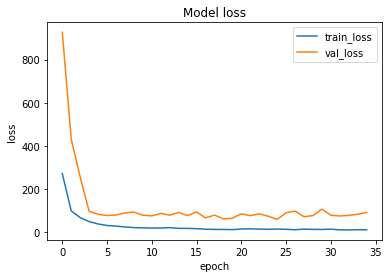

In [ ]:
# Here we are going to plot what our model's training & validation loss values were with respect to the epochs we set.
# We're able to see that had we stopped this model training around 5 epochs, we would've had about the same amount of loss.
# When the validation loss plateaus, it's just an indication that the model will typically not perform any better on unseen data.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# Read the csv files for the facial expression data consisted of just emotions along with their respective image examples.
facialexpression_df = pd.read_csv('icml_face_data.csv')
facialexpression_df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...,...,...
24563,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564,0,181 177 176 156 178 144 136 132 122 107 131 16...
24565,3,178 174 172 173 181 188 191 194 196 199 200 20...
24566,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


In [ ]:
# Our custom function to convert pixel values in string format to array format for the following augmentation below.
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
# Augmentation of images to resize them from (48, 48) to (96, 96) so that it matches the image dimensions from the first model.
def resize(x): 
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(string2array(x)))
facialexpression_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [ ]:
facialexpression_df.shape

(24568, 2)

In [ ]:
# Check for the presence of null values in the data frame for the sake of having to clean or not.
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
# Dictionary tying the keys to the emotion data above so that we could translate them to their respective emotions.
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

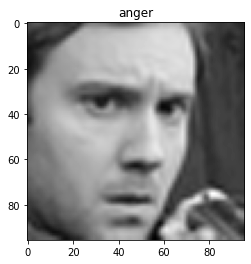

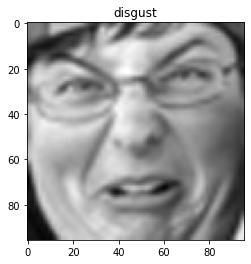

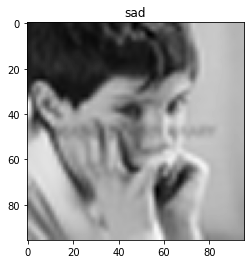

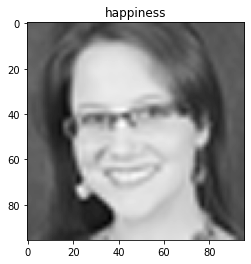

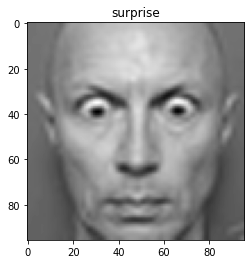

In [ ]:
emotions = [0, 1, 2, 3, 4]
# This grabs the first image that represents the respective emotions from the dataframe containing all the examples and plots them as a preview.
for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

In [ ]:
# Here we are able to see that the emotion we have the least amount of data for is almost a tenth of the amount of data we have for the
# other emotions to train with. This may prove to be a representation of too little data to train with.
facialexpression_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

<AxesSubplot:ylabel='emotion'>

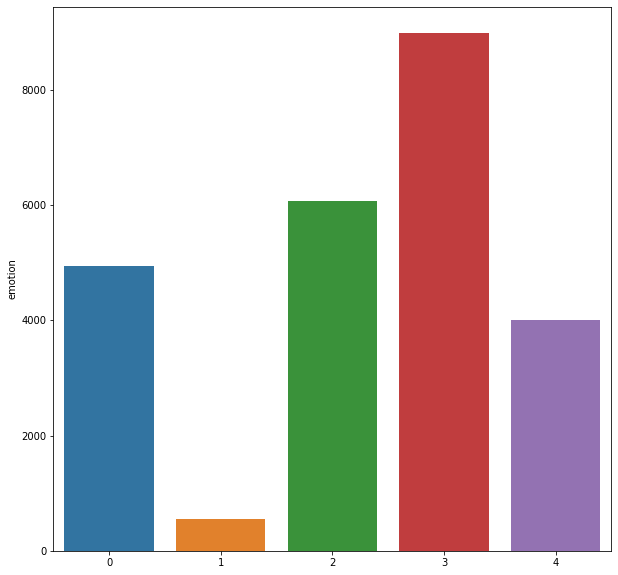

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

In [ ]:
# Split the dataframe in to features and labels so that we have a binary matrix that's representative of the category each image's emotion.
from keras.utils import to_categorical

x = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])


In [ ]:
x[0], y

(array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
          40.5394  ],
        [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
          41.223618],
        [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
          42.31465 ],
        ...,
        [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
          51.74736 ],
        [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
          71.13246 ],
        [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
          82.91585 ]], dtype=float32), array([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.]], dtype=float32))

In [ ]:
x = np.stack(x, axis = 0)
x = x.reshape(24568, 96, 96, 1)

print(x.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [ ]:
# Split the dataframe in to train, test and validation data frames for the training of this second model for emotion estimation.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, shuffle = True)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, shuffle = True)

print(x_val.shape, y_val.shape, "\n", x_test.shape, y_test.shape, "\n", x_train.shape, y_train.shape)

(1228, 96, 96, 1) (1228, 5) 
 (1229, 96, 96, 1) (1229, 5) 
 (22111, 96, 96, 1) (22111, 5)


In [ ]:
# Image normalization to run throught the model.

x_train = x_train/255
x_val   = x_val /255
x_test  = x_test/255

In [ ]:
input_shape = (96, 96, 1)
# Input tensor shape
x_input = Input(input_shape)

# Zero-padding
x = ZeroPadding2D((3, 3))(x_input)

# 1 - stage
x = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(x)
x = BatchNormalization(axis =3, name = 'bn_conv1')(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides= (2, 2))(x)

# 2 - stage
x = res_block(x, filter= [64, 64, 256], stage= 2)
# 3 - stage
x = res_block(x, filter= [128, 128, 512], stage= 3)

# Average Pooling
x = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(x)

# Final layer
x = Flatten()(x)
x = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(x)

model_2_emotion = Model( inputs= x_input, outputs = x, name = 'Resnet18')
model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 102, 102, 1)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_1[0][0]']       
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']           

In [ ]:
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
# Recall that the first facial key points model was saved as follows: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [ ]:
# The ImageDataGenerator class provides an easy way to apply image augmentation to training data, as well as rescaling, resizing, rotating, etc., that we'll be 
# running the image data through for the model so that there's less likelihood for overfitting and improves generalization and accuracy on the test set.
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")


In [ ]:
# Similar to the first model, we are going to be training our second model with the image/emotion label data except run the augmented image
# data instead of how before we ran the base data straight through. The duration of time per epoch is about a factor of 6 longer, due to the
# augmenting of image data in large batches, where the ImageDataGenerator takes extra time to feed the model after altering the pixel data.
history = model_2_emotion.fit(train_datagen.flow(x_train, y_train, batch_size=64),
	validation_data=(x_val, y_val), steps_per_epoch=len(x_train) // 64,
	epochs= 35, callbacks=[checkpointer, earlystopping])


Epoch 1/35
345/345 [==============================] - ETA: 0s - loss: 1.2715 - accuracy: 0.4803
Epoch 1: val_loss improved from inf to 1.54009, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 45s 87ms/step - loss: 1.2715 - accuracy: 0.4803 - val_loss: 1.5401 - val_accuracy: 0.2883
Epoch 2/35
345/345 [==============================] - ETA: 0s - loss: 0.9219 - accuracy: 0.6366
Epoch 2: val_loss improved from 1.54009 to 1.02833, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 28s 81ms/step - loss: 0.9219 - accuracy: 0.6366 - val_loss: 1.0283 - val_accuracy: 0.5643
Epoch 3/35
345/345 [==============================] - ETA: 0s - loss: 0.8131 - accuracy: 0.6815
Epoch 3: val_loss improved from 1.02833 to 0.85490, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 28s 82ms/step - loss: 0.8131 - accuracy: 0.6815 - val_loss: 0.8549 - val_accuracy: 0.6539
Epoch 4/35
345/345 [===

In [ ]:
# Saving this second model data architecture to json file for use later on.

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

In [ ]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# Here we're going to load a preset of better tuned weights for the algorithm to determine the accuracy of those weights vs the test data
# we split earlier to determine how our model's estimated emotions compare to the actual data.
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

score = model_2_emotion.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(score[1]))
history.history.keys()

39/39 [==============================] - 1s 12ms/step - loss: 0.3291 - accuracy: 0.8796
Test Accuracy: 0.8795769214630127


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# We had an accuracy of 88% for the pretrained model vs the actual data! Closest we got to that with our model we built and parameters defined for the resources
# we're working with were ~80%. Now let's plot the accuracy and loss with respect to elapsed epochs from our training and validation sets.
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

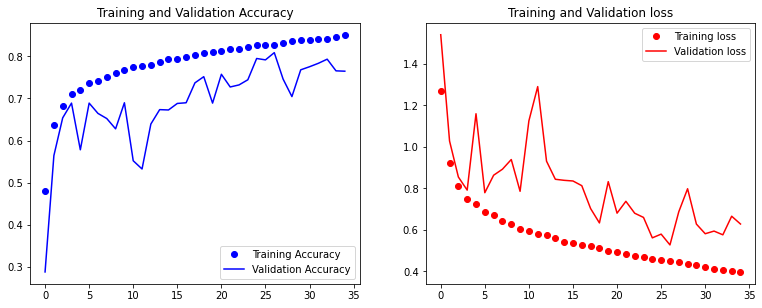

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,4.8))

ax1.plot(epochs, accuracy, 'bo', label='Training Accuracy')
ax1.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'ro', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and Validation loss')
ax2.legend()

plt.show()

In [ ]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

39/39 [==============================] - 1s 7ms/step


<AxesSubplot:>

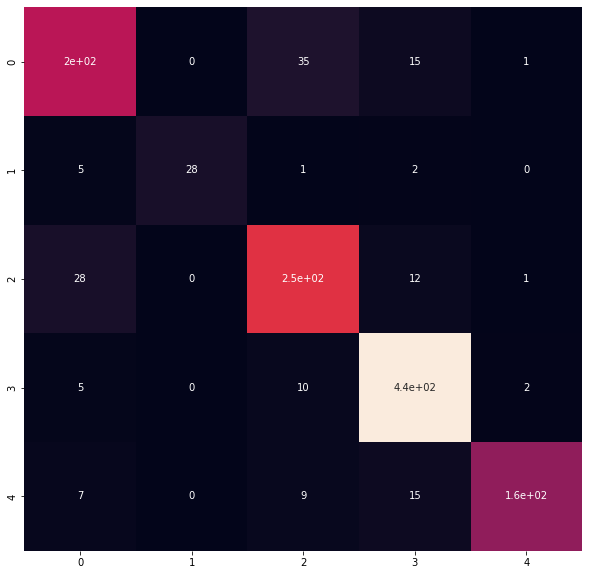

In [ ]:
# Now let's see the confusion matrix for how the true values compare to the predicted values made by our trained model.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)
# Below we are able to see that down the diagonal of this line are very small values approximately 0, indicating the classifier made little to no incorrect predictions
# for those emotions. The larger values, e.g. values >10, indicate where our classifier is making the most amount of misclassifications.
# It's noteworthy to point out the classifier making some of the highest amount of misclassification in our dataset around the emotion 'disgust'. This could have
# likely been the result of that dataset representing ~2.2 of the total data, leaving little to no data to train our model compared to the other emotions.

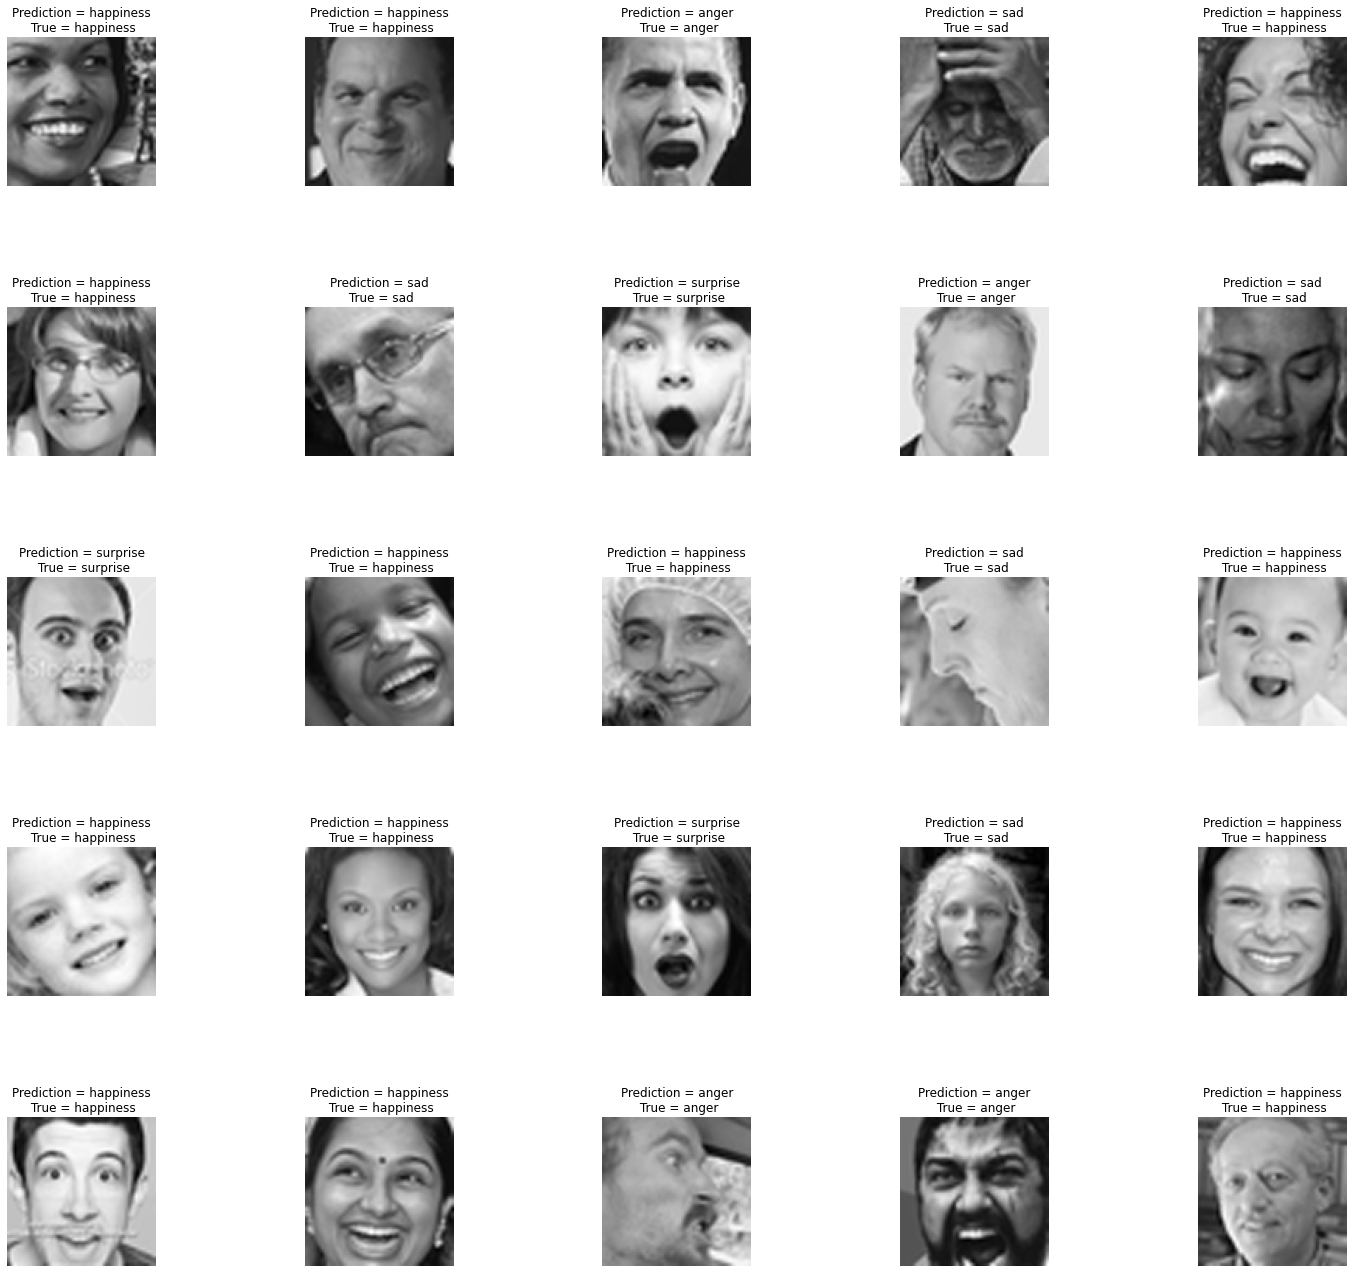

In [ ]:
# Let's make a grided plot of 25 images (5x5) to observe some examples of the predicted emotion vs true emotion for their respective emotion underneath.
length = 5
width = 5

fig, axes = plt.subplots(length, width, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, length*width):
    axes[i].imshow(x_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       254
           1       1.00      0.78      0.88        36
           2       0.82      0.86      0.84       291
           3       0.91      0.96      0.94       458
           4       0.98      0.84      0.90       190

    accuracy                           0.88      1229
   macro avg       0.90      0.85      0.87      1229
weighted avg       0.88      0.88      0.88      1229



In [ ]:
def predict(x_test):
  # Making prediction from the keypoint model
  df_predict = model_1_facialKeyPoints.predict(x_test)
  # Making prediction from the emotion model
  df_emotion = np.argmax(model_2_emotion.predict(x_test), axis=-1)
  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)
  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= copy_df_col)
  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion
  return df_predict

In [ ]:
df_predict = predict(x_test)
df_predict.head()

39/39 [==============================] - 0s 6ms/step


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,59.335716,37.273163,31.015810,39.786751,54.267029,38.613697,65.168770,37.790333,37.151737,39.879253,...,51.965897,61.488533,69.338181,34.773495,72.059669,49.719212,67.353775,50.269058,74.400055,3
1,65.844223,37.882248,31.956364,36.987072,58.692165,38.700642,72.860428,38.760921,38.497051,38.039307,...,57.510139,63.192688,73.737915,33.854759,73.339172,48.064713,74.365784,48.015953,75.755356,3
2,27.306517,30.459837,65.727180,33.794781,35.226410,32.089775,19.425621,30.865358,58.477959,33.941284,...,55.769463,27.563295,77.145470,59.989357,79.634315,45.819210,76.676048,45.231121,82.956406,0
3,61.002266,38.057354,38.447578,35.070095,56.101330,37.988499,66.256767,39.594078,43.065727,36.029747,...,46.752373,59.401875,65.359154,36.844582,62.691254,46.690479,62.105663,46.470966,66.996544,2
4,58.024185,37.964870,44.510841,39.995377,55.212402,39.138771,60.509415,38.984859,46.034554,40.315369,...,56.585690,58.401379,80.676888,46.409405,82.237717,50.044659,76.322647,51.123402,90.516846,3


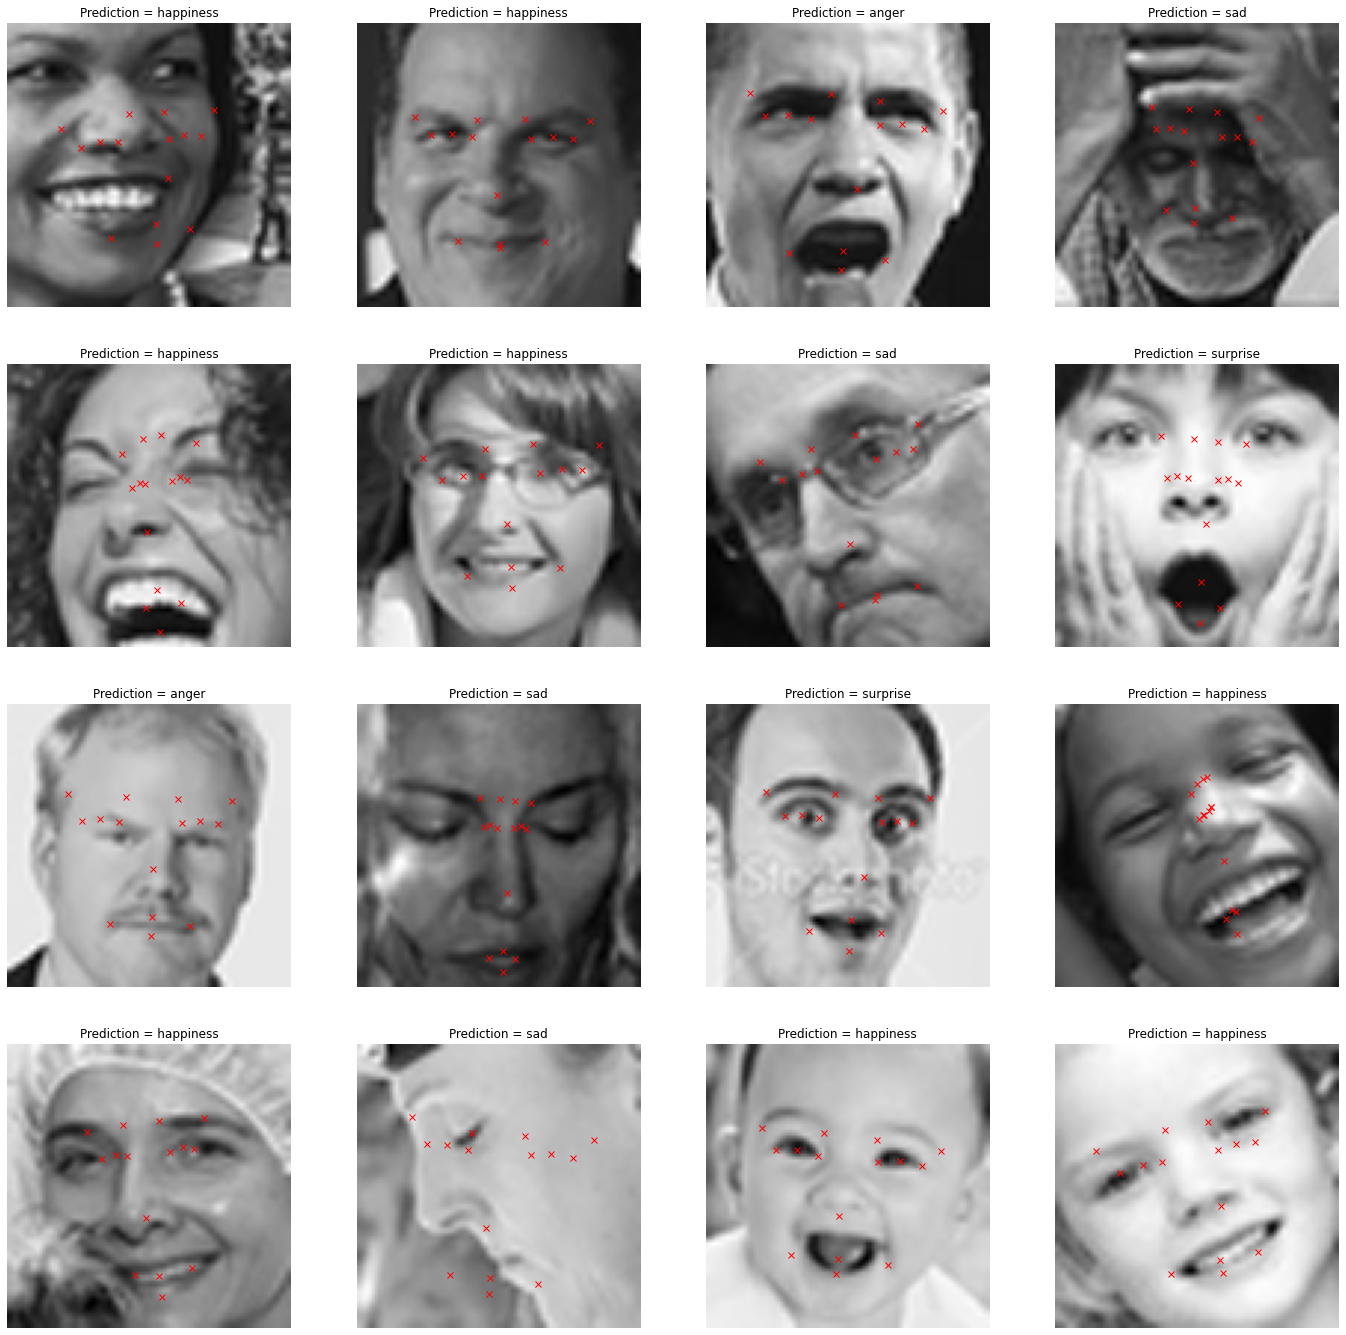

In [ ]:
# Plotting the test images and their predicted keypoints and emotions to finally put both trained models together.

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(x_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')